# Boston 311 Service Requests Analysis (2021)

## Data Preparation

### Importing all required Libraries

In [1]:
#Loading packages:
import numpy as np #Importing 'Numpy' Library that will be used to perform mathematical operations.
import pandas as pd #Importing 'Pnadas' Library to perform data manupalation and analysis.
import datetime as dt #Importing 'Datetime' Library that will help to perform operations on date variables.
import re #importing 'Regular Expression' Library that will help to perform data cleaning operations.
import warnings
import geopandas as gpd #importing geopandas to work with geospatial data easily.
import matplotlib as mp #importing matplotlib to plot data into a graphical representation.
from matplotlib import pyplot as plt
%matplotlib inline

### Importing Data

In [2]:
#Loading 311 service requests data.
ogfilename = 'og_311_ServiceRequest_2021.csv' #Creating a variable to store path and name of the dataset.
service_request_df = pd.read_csv(ogfilename, dtype={'location_zipcode': 'str'},low_memory = False) 
#With the help of 'Pandas read_csv()' function to read the csv data and store in a new dataframe. 
#Here we are importing zip codes as string/object to avoid any errors while importing data.

#Loading Boston Neighborhood geographical data.
df_places = gpd.read_file('Boston_Neighborhoods.geojson') #Creating a variable to store path and name of the dataset.

## Exploratory Data Analysis

In [3]:
#Exploring Service Request dataset.
print(service_request_df.info())
#With the help of info() function we are extracting the structure, column data type and number of values present in each rows.
service_request_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273951 entries, 0 to 273950
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   case_enquiry_id                 273951 non-null  int64  
 1   open_dt                         273951 non-null  object 
 2   target_dt                       238320 non-null  object 
 3   closed_dt                       244729 non-null  object 
 4   ontime                          273951 non-null  object 
 5   case_status                     273951 non-null  object 
 6   closure_reason                  273951 non-null  object 
 7   case_title                      273945 non-null  object 
 8   subject                         273951 non-null  object 
 9   reason                          273951 non-null  object 
 10  type                            273951 non-null  object 
 11  queue                           273951 non-null  object 
 12  department      

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source
0,101003578872,2021-01-01 00:06:37,2021-01-06 08:30:00,2021-01-01 05:36:42,ONTIME,Closed,Case Closed. Closed date : Fri Jan 01 05:36:42...,Improper Storage of Trash (Barrels),Public Works Department,Code Enforcement,...,C11,Dorchester,5,Ward 7,0709,797 Columbia Rd,02125,42.3202,-71.0572,Citizens Connect App
1,101003578875,2021-01-01 00:15:47,2021-01-05 08:30:00,2021-01-02 12:49:26,ONTIME,Closed,Case Closed. Closed date : 2021-01-02 12:49:26...,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,...,D14,Allston / Brighton,15,Ward 22,2211,50 Newton St,02135,42.3569,-71.1650,Citizens Connect App
2,101003578879,2021-01-01 00:26:46,NaN,2021-01-04 13:56:41,ONTIME,Closed,Case Closed. Closed date : 2021-01-04 13:56:41...,Notification,Mayor's 24 Hour Hotline,Notification,...,B2,Dorchester,13,13,1305,693 Dudley St,02125,42.3594,-71.0587,Constituent Call


Utilizing Pandas **info()** method, we can see that there are **273951** data rows and **29** columns, and it is using more than **60.6 MB** of memory.At first sight, the data are of three types: *int64, float64, and object*. There are numerous columns with missing data that must be addressed before proceeding to the analysis phase.
 </div>

In [4]:
#Exploring Geolocation dataset
print(df_places.info())
df_places.head(3)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   OBJECTID         26 non-null     int64   
 1   Name             26 non-null     object  
 2   Acres            26 non-null     float64 
 3   Neighborhood_ID  26 non-null     object  
 4   SqMiles          26 non-null     float64 
 5   ShapeSTArea      26 non-null     float64 
 6   ShapeSTLength    26 non-null     float64 
 7   geometry         26 non-null     geometry
dtypes: float64(4), geometry(1), int64(1), object(2)
memory usage: 1.8+ KB
None


,OBJECTID,Name,Acres,Neighborhood_ID,SqMiles,ShapeSTArea,ShapeSTLength,geometry
0,27,Roslindale,1605.568237,15,2.51,6.993827e+07,53563.912597,"MULTIPOLYGON (((-71.12593 42.27201, -71.12611 ..."
1,28,Jamaica Plain,2519.245394,11,3.94,1.097379e+08,56349.937161,"POLYGON ((-71.10499 42.32610, -71.10503 42.326..."
2,29,Mission Hill,350.853564,13,0.55,1.528312e+07,17918.724113,"POLYGON ((-71.09043 42.33577, -71.09050 42.335..."


We could observe that there are **26** data rows and **7** columns. At first sight, the data are of three types: *int64, geometry, and object*.
 </div>

## Data Cleaning and Preprocessing

### Dropping Unwanted Columns

In [5]:
#Dropping not required columns from the data frame.
service_request_df.drop(['submittedphoto','closedphoto','fire_district','pwd_district','city_council_district',
                         'police_district','precinct'],axis = 1,inplace = True) 
#With the help of drop() function we are droping irrelevant columns and passing attributes as 'axis = 1' that indicates columns.
print(service_request_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273951 entries, 0 to 273950
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   case_enquiry_id                 273951 non-null  int64  
 1   open_dt                         273951 non-null  object 
 2   target_dt                       238320 non-null  object 
 3   closed_dt                       244729 non-null  object 
 4   ontime                          273951 non-null  object 
 5   case_status                     273951 non-null  object 
 6   closure_reason                  273951 non-null  object 
 7   case_title                      273945 non-null  object 
 8   subject                         273951 non-null  object 
 9   reason                          273951 non-null  object 
 10  type                            273951 non-null  object 
 11  queue                           273951 non-null  object 
 12  department      

Dropping all the unwanted columns from the data frame as they are not relevent for our analysis, also we could observe that the memory usage droped from **60.6 MB** to **46.0 MB**

### Correcting Data Types

In [6]:
#Before converting data, let's explore which columns would be suitable candidates for a categorical data type by counting the number of unique entries/values in each column and using that information to assess whether any columns are irrelevant.
unique_counts = pd.DataFrame.from_records([(col, service_request_df[col].nunique()) for col in service_request_df.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
4,ontime,2
5,case_status,2
21,source,6
8,subject,11
12,department,16
15,neighborhood_services_district,17
14,neighborhood,24
18,location_zipcode,34
9,reason,45
16,ward,56


Before converting data into categorical, I'm correcting the data for date parameter.

In [7]:
#There are 3 columns that holds date values hence we need to convert them to datetime data type.
service_request_df['open_dt'] = service_request_df['open_dt'].astype('datetime64[ns]')
service_request_df['target_dt'] = service_request_df['target_dt'].astype('datetime64[ns]')
service_request_df['closed_dt'] = service_request_df['closed_dt'].astype('datetime64[ns]')

#Converting the variables with less than 175 unique values to categorical data type.

cols_to_exclude = ['open_dt','target_dt','closed_dt','location_zipcode'] #Columns to be excluded.
#With the help of 'for' loop we are parsing each column and finding number of unique data in that particular column and then if the count it less than 60 unique values we are converting it into categorical data type.
for col in service_request_df.columns:
    if service_request_df[col].nunique() < 175 and col not in cols_to_exclude:
        #print (f'{col} have {service_request_df[col].nunique()} unique values')
        service_request_df[col] = service_request_df[col].astype('category')

#With the help of info() function we are extracting the structure, column data type and number of values present in each rows.
print (service_request_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273951 entries, 0 to 273950
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   case_enquiry_id                 273951 non-null  int64         
 1   open_dt                         273951 non-null  datetime64[ns]
 2   target_dt                       238320 non-null  datetime64[ns]
 3   closed_dt                       244729 non-null  datetime64[ns]
 4   ontime                          273951 non-null  category      
 5   case_status                     273951 non-null  category      
 6   closure_reason                  273951 non-null  object        
 7   case_title                      273945 non-null  object        
 8   subject                         273951 non-null  category      
 9   reason                          273951 non-null  category      
 10  type                            273951 non-null  categor

Converting the objects to categorical data types also helped to lower the memory usage from **46 MB** to **28 MB**.

### Handling NULL values

In [8]:
#With the help of 'isna()' function we are checking for NULL values in the dataset.
service_request_df.isna().sum()

case_enquiry_id                       0
open_dt                               0
target_dt                         35631
closed_dt                         29222
ontime                                0
case_status                           0
closure_reason                        0
case_title                            6
subject                               0
reason                                0
type                                  0
queue                                 0
department                            0
location                              0
neighborhood                        243
neighborhood_services_district       22
ward                                  0
location_street_name               2822
location_zipcode                  61070
latitude                              0
longitude                             0
source                                0
dtype: int64

By reviewing the data set we could found that there were many rows with balnk spaces so we need to make sure them they are marked as **'np.nan'** value. The columns that have whitespaces are as below:
- closure_reason
- location
- neighborhood

In [9]:
service_request_df['closure_reason'].replace(' ', np.nan, inplace = True)
service_request_df['location'].replace(' ', np.nan, inplace = True)
service_request_df['neighborhood'].replace(' ', np.nan, inplace = True)


cols_to_exclude = ['closure_reason','location','neighborhood'] #Columns to be excluded.
#With the help of 'for' loop we are parsing each column and finding number of unique data in that particular column and then if the count it less than 60 unique values we are converting it into categorical data type.
for col in service_request_df.columns:
    service_request_df[col].replace(' ', np.nan, inplace = True)

print(service_request_df.isna().sum())

case_enquiry_id                       0
open_dt                               0
target_dt                         35631
closed_dt                         29222
ontime                                0
case_status                           0
closure_reason                    29043
case_title                            6
subject                               0
reason                                0
type                                  0
queue                                 0
department                            0
location                           2822
neighborhood                       3065
neighborhood_services_district     2844
ward                               2822
location_street_name               2822
location_zipcode                  61070
latitude                              0
longitude                             0
source                                0
dtype: int64


After rechecking missing values in the other columns we could found out that there were more values missing in other coulumns too which are now marked as **'np.nan'** value.

### Converting data to lowercase

In [10]:
for i in service_request_df.columns:
    if ((service_request_df.dtypes[i] == 'object') or (service_request_df.dtypes[i] == 'category')):
        service_request_df[i] = service_request_df[i].str.lower()
service_request_df.head(3)

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,department,location,neighborhood,neighborhood_services_district,ward,location_street_name,location_zipcode,latitude,longitude,source
0,101003578872,2021-01-01 00:06:37,2021-01-06 08:30:00,2021-01-01 05:36:42,ontime,closed,case closed. closed date : fri jan 01 05:36:42...,improper storage of trash (barrels),public works department,code enforcement,...,pwdx,797 columbia rd dorchester ma 02125,dorchester,5,ward 7,797 columbia rd,02125,42.3202,-71.0572,citizens connect app
1,101003578875,2021-01-01 00:15:47,2021-01-05 08:30:00,2021-01-02 12:49:26,ontime,closed,case closed. closed date : 2021-01-02 12:49:26...,parking enforcement,transportation - traffic division,enforcement & abandoned vehicles,...,btdt,50 newton st brighton ma 02135,allston / brighton,15,ward 22,50 newton st,02135,42.3569,-71.1650,citizens connect app
2,101003578879,2021-01-01 00:26:46,NaT,2021-01-04 13:56:41,ontime,closed,case closed. closed date : 2021-01-04 13:56:41...,notification,mayor's 24 hour hotline,notification,...,info,693 dudley st dorchester ma 02125,dorchester,13,13,693 dudley st,02125,42.3594,-71.0587,constituent call


### Adding New Columns

In [11]:
#Adding this two new columns to fetch the month and month letter from the open_dt variable.
service_request_df['DUMMY_open_dt_month_letter'] = service_request_df['open_dt'].dt.month_name()
service_request_df['DUMMY_open_dt_month'] = service_request_df['open_dt'].dt.month
service_request_df['DUMMY_close_dt_month_letter'] = service_request_df['closed_dt'].dt.month_name()
service_request_df['DUMMY_close_dt_month'] = service_request_df['closed_dt'].dt.month
#Adding a new column to calculate the aproximate days took to close the requests.
service_request_df['aprx_days']= service_request_df['closed_dt'] - service_request_df['open_dt']


## Data Analysis

### 1. Preferred Mode of Request

Text(0.5, 1.0, 'Most Common method to report issues.')

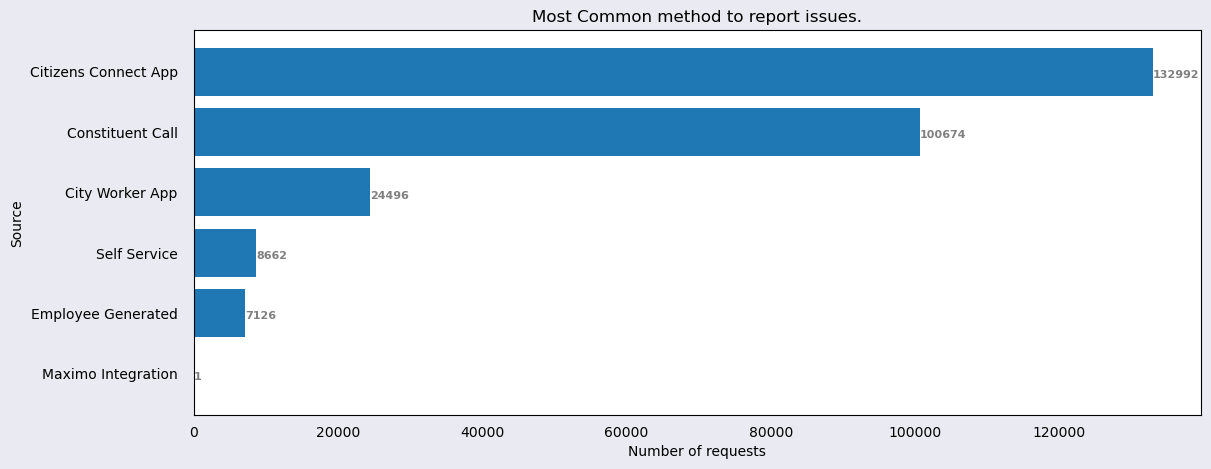

In [12]:
preferredmodedf = service_request_df.groupby(['source'],as_index = False)['case_enquiry_id'].count().sort_values('case_enquiry_id',ascending = False)
#Here we are grouping the data as per the source to count the number of requests as per the source and saving the result in a new dataframe.

#Plot Graph
#fetching the values into a variable.
# Set the background color for the plot
facecolor = '#eaeaf2'

# Extract the 'source' column from 'preferredmodedf' DataFrame and capitalize the strings
source = preferredmodedf['source'].str.title()

# Extract the 'case_enquiry_id' column from 'preferredmodedf' DataFrame
numberofrequests = preferredmodedf['case_enquiry_id']

# Create a figure and axis for the horizontal bar plot with specified size and background color
fig1, ax1 = plt.subplots(figsize=(13, 5), facecolor=facecolor)

# Plot a horizontal bar chart with 'source' on y-axis and 'numberofrequests' on x-axis
ax1.barh(source, numberofrequests)

# Remove ticks from x-axis and y-axis
ax1.xaxis.set_ticks_position('none')
ax1.yaxis.set_ticks_position('none')

# Add padding to the ticks on x-axis and y-axis
ax1.xaxis.set_tick_params(pad=4)
ax1.yaxis.set_tick_params(pad=8)

# Invert y-axis to display the highest values at the top
ax1.invert_yaxis()

# Add text labels for each bar displaying the number of requests at the end of the bars
for i in ax1.patches:
    plt.text(i.get_width() + 0.2, i.get_y() + 0.5,
             str(round((i.get_width()), 2)),
             fontsize=8, fontweight='bold',
             color='grey')

# Set label for y-axis
ax1.set_ylabel('Source')

# Set label for x-axis
ax1.set_xlabel('Number of requests')

# Set title for the plot with specified location
ax1.set_title('Most Common method to report issues.',
              loc='center')


# #Saving file.
# filename = 'q1-most-preffered-method-to-raise-request'
# plt.savefig(filename+'.png', facecolor=facecolor)

The **‘Citizen Connect App’ i.e BOS:311 App** is the most preferred mode of requesting non-emergency requests throughout the city of Boston.

### 2. Total Requests in 2021

([<matplotlib.patches.Wedge at 0x20b329f65f0>,
 [Text(-0.6332853626309387, 0.4380064491276361, ''),
  Text(0.45400998261098074, -0.6219123215450687, ''),
  Text(0.703091223056841, -0.31394702110457345, ''),
  Text(0.7672298599387221, -0.06525597304775292, '')],
 [Text(-0.3454283796168756, 0.23891260861507424, '80.7%'),
  Text(0.24764180869689856, -0.33922490266094657, '8.6%'),
  Text(0.3835043034855496, -0.17124382969340368, '8.0%'),
  Text(0.4184890145120302, -0.035594167116956135, '2.7%')])

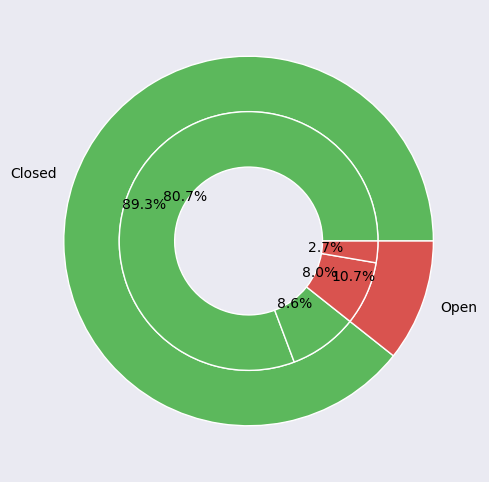

In [13]:
#Here we are calculating the total number of requests received in 2021 and groupuing by case_status
reqstatusdf = service_request_df[['case_status']].value_counts().reset_index().rename(columns = {0 : 'Count'})
reqcompstatusdf =service_request_df[['case_status','ontime']].value_counts().reset_index().rename(columns = {0 : 'requests_count'})

# Define colors for the plot and font
facecolor = '#eaeaf2'  # Background color
font_color = '#000000'  # Font color for labels
hfont = {'fontname': 'Calibri'}  # Font style for labels

# Define labels for the outer and inner pie charts
labels_outer = ['Closed', 'Open']
labels_inner = ['Ontime', 'Overdue']

# Define size of the inner pie chart and values for the outer pie chart
size = 0.3  # Size of the inner pie compared to the outer pie
vals = reqcompstatusdf['requests_count']  # Values for the inner pie chart

# Major category values = sum of minor category values
group_sum = reqstatusdf['Count']  # Values for the outer pie chart

# Create a figure and axis for the pie chart with specified size and background color
fig, ax = plt.subplots(figsize=(10, 6), facecolor=facecolor)

# Define colors for outer and inner pies
a, b = [plt.cm.summer, plt.cm.autumn]
outer_colors = ['#5cb85c', '#d9534f']  # Green for Closed, Red for Open
inner_colors = ['#5cb85c', '#5cb85c', '#d9534f', '#d9534f']  # Shades of Green and Red for Ontime and Overdue

# Plot the outer pie chart
ax.pie(group_sum,
       radius=1,  # Full radius
       colors=outer_colors,
       labels=labels_outer,
       autopct='%1.1f%%',
       textprops={'color': font_color},
       wedgeprops=dict(width=size, edgecolor='w'))  # Width and edgecolor for wedges

# Plot the inner pie chart
ax.pie(vals,
       radius=1 - size,  # Inner pie with reduced radius
       autopct='%1.1f%%',
       colors=inner_colors,
       textprops={'color': font_color},
       wedgeprops=dict(width=size, edgecolor='w'))  # Width and edgecolor for wedges

# Uncomment the following lines to save the image
# Saving image      
# filename = 'request-status-as-of-31stdec-21'
# plt.savefig(filename+'.png', facecolor=facecolor)


In the year 2021, a total of 2,73,951 requests were received, with 89.3% of the requests closed and only 2.7% of the requests opened being overdue. Based on this computation, it is reasonable to conclude that the city council actively responds to citizen requests.

### 3. Monthly Request Analysis

#### 3.1 Request Inflow

Text(0.5, 1.0, 'Monthly requests inflow')

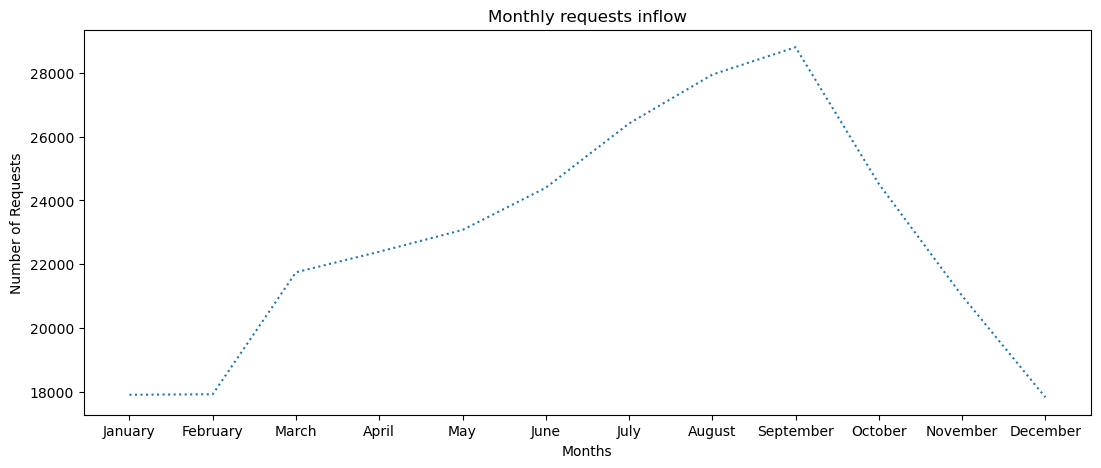

In [14]:
# Counting monthly open requests and sorting them by month
monthlyrequestsopen = service_request_df[['DUMMY_open_dt_month_letter','DUMMY_open_dt_month']].value_counts().reset_index().rename(columns = {0 : 'Count'}).sort_values(by = 'DUMMY_open_dt_month',ascending = True)
# Extracting x (month names) and y (count of requests) data
x = monthlyrequestsopen['DUMMY_open_dt_month_letter']  # Month names
y = monthlyrequestsopen['Count']  # Count of requests

# Create a figure and axis for plotting the monthly request inflow
fig1, ax2 = plt.subplots(figsize=(13, 5))  # Define figure size

# Plotting a line chart for monthly request inflow
plt.plot(x, y, linestyle='dotted')  # Dotted line plot

# Labeling y-axis and x-axis
ax2.set_ylabel('Number of Requests')  # Set label for y-axis
ax2.set_xlabel('Months')  # Set label for x-axis

# Adding a title for the plot
ax2.set_title('Monthly requests inflow', loc='center')  # Set plot title

# Saving the plot as an image file
# filename = 'monthly-request-open'  # Define filename
# plt.savefig(filename + '.png', facecolor=facecolor)  # Save the plot as a PNG file with defined facecolor


#### 3.2 Requests Closed

Text(0.5, 1.0, 'Monthly requests closed')

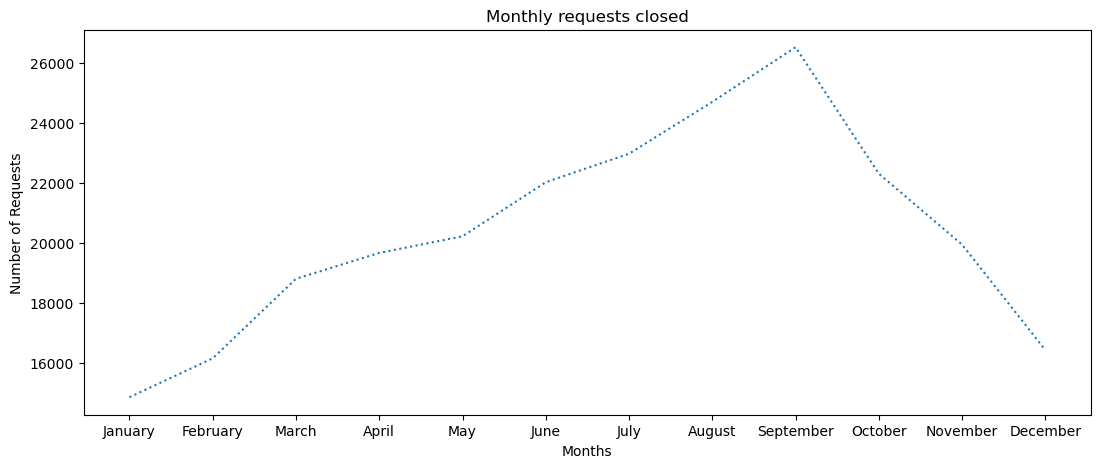

In [15]:
# Extract and count monthly requests data for open cases, sorting by month
monthlyrequestsclose = service_request_df[['DUMMY_close_dt_month_letter','DUMMY_close_dt_month']].value_counts().reset_index().rename(columns = {0 : 'Count'}).sort_values(by = 'DUMMY_close_dt_month',ascending = True)

# Display the DataFrame containing monthly requests for closed cases
monthlyrequestsclose

# Extracting x and y values for plotting
x = monthlyrequestsclose['DUMMY_close_dt_month_letter']
y = monthlyrequestsclose['Count']

# Create a figure and axis for the line plot with specified size
fig1, ax2 = plt.subplots(figsize=(13, 5))

# Plotting a line graph using x and y with dotted lines
plt.plot(x, y, linestyle='dotted')

# Set label for y-axis
ax2.set_ylabel('Number of Requests')

# Set label for x-axis
ax2.set_xlabel('Months')

# Set title for the plot with specified location
ax2.set_title('Monthly requests closed', loc='center')

# # Saving the plot as an image
# filename = 'monthly-request-closed'
# plt.savefig(filename+'.png', facecolor=facecolor)


### 4. Department wise requests inflow

Text(0.5, 1.0, 'Department wise requests')

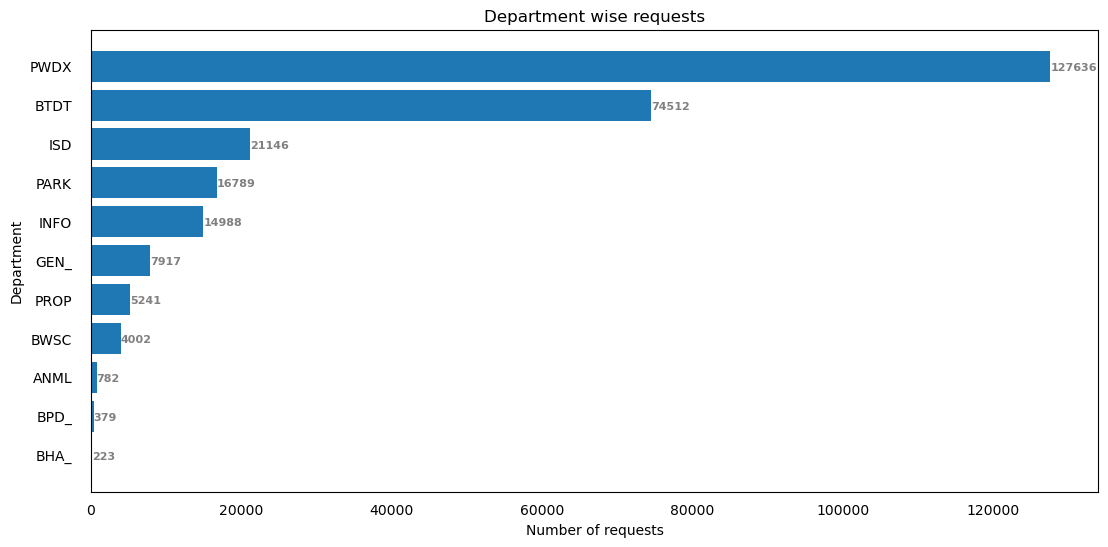

In [16]:
# Count the number of requests per department and select the top 11 departments
deptreq = service_request_df['department'].value_counts().reset_index().sort_values(by='department', ascending=False)[0:11]

# Extract department names and their corresponding request counts
source = deptreq['index'].str.upper()  # Departments
numberofrequests = deptreq['department']  # Number of requests for each department

# Create a figure and axis for the horizontal bar plot with specified size
fig1, ax1 = plt.subplots(figsize=(13, 6))

# Plotting a horizontal bar chart with departments on y-axis and request counts on x-axis
ax1.barh(source, numberofrequests)

# Remove ticks from x-axis and y-axis
ax1.xaxis.set_ticks_position('none')
ax1.yaxis.set_ticks_position('none')

# Add padding to the ticks on x-axis and y-axis
ax1.xaxis.set_tick_params(pad=5)
ax1.yaxis.set_tick_params(pad=10)

# Invert y-axis to display the highest values at the top
ax1.invert_yaxis()

# Add text labels for each bar displaying the number of requests at the end of the bars
for i in ax1.patches:
    plt.text(i.get_width() + 0.2, i.get_y() + 0.5,
             str(round((i.get_width()), 2)),
             fontsize=8, fontweight='bold',
             color='grey')

# Set label for y-axis
ax1.set_ylabel('Department')

# Set label for x-axis
ax1.set_xlabel('Number of requests')

# Set title for the plot with specified location
ax1.set_title('Department wise requests', loc='center')

# Save the plot as an image
#plt.savefig('departmentwise-inflow.png')

The department with highest number of requests is Public Works Department with 127 hundred requests and the least is Boston Housing Authority with only 223 requests.

### 5. Average Turnaround time of the requests

7 days 13:48:09.775866366


Text(0.5, 1.0, 'Department turnaround time')

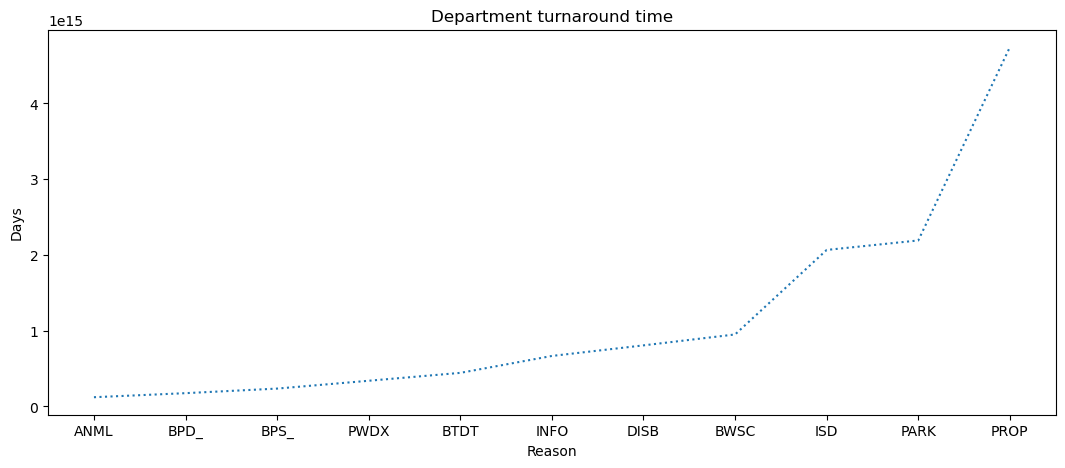

In [17]:
# Calculate and print the average response time for closed cases
print(service_request_df[(service_request_df['case_status'] == 'closed')]['aprx_days'].mean())

# Calculate the average response time per department for non-open cases
avgturnaround = service_request_df[(service_request_df['case_status'] != 'open')][['department', 'aprx_days']].groupby(['department']).mean().reset_index().sort_values(by=['aprx_days'])[4:15]

# Extracting x and y values for plotting
x = avgturnaround['department'].str.upper()
y = avgturnaround['aprx_days']

# Create a figure and axis for the line plot with specified size
fig1, ax2 = plt.subplots(figsize=(13, 5))

# Plotting a line graph using x and y with dotted lines
plt.plot(x, y, linestyle='dotted')

# Set label for y-axis
ax2.set_ylabel('Days')

# Set label for x-axis
ax2.set_xlabel('Reason')

# Set title for the plot with specified location
ax2.set_title('Department turnaround time', loc='center')

# filename = 'department-turnaround-time'
# plt.savefig(filename+'.png', facecolor=facecolor)

Here Animal Control had the least whereas the property management department had the higest turnaround time. We can observe a sharp rise in turnaound time between Park management and Property Management department.

### 6. Top Service Request Reasons

In [18]:
# Capture the top 10 reasons for service requests and store them in a new dataframe
topservicerequest_reason = service_request_df['reason'].value_counts().reset_index().rename(columns={'index': 'Reason', 'reason': 'values_count'}).sort_values('values_count', ascending=False)[0:11]

# Calculate the total count of requests for these top reasons
reason_sum = topservicerequest_reason['values_count'].sum()

# Calculate the percentage share of each top reason out of the total count
topservicerequest_reason['percentage_share'] = round((topservicerequest_reason['values_count'] / reason_sum) * 100)

# Display the dataframe containing the top service request reasons along with their percentage share
topservicerequest_reason

,Reason,values_count,percentage_share
0,enforcement & abandoned vehicles,62506,26.0
1,street cleaning,37609,16.0
2,sanitation,31155,13.0
3,code enforcement,24542,10.0
4,highway maintenance,22489,10.0
5,signs & signals,10942,5.0
6,recycling,10728,5.0
7,trees,9764,4.0
8,building,9445,4.0
9,street lights,9116,4.0


Text(0.5, 1.0, 'Top 5 Reasons')

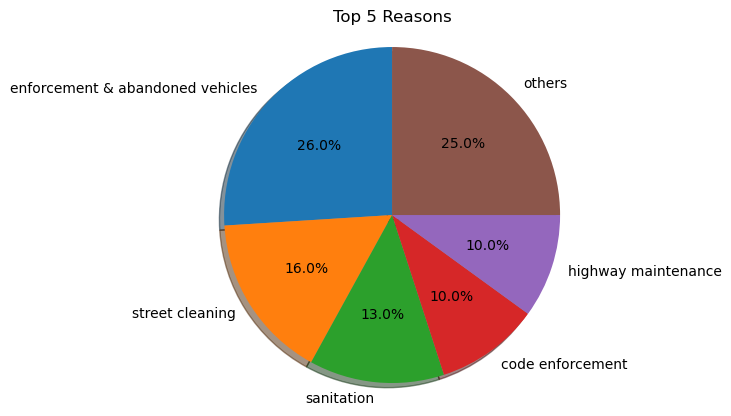

In [19]:
# Select the top 5 reasons from the dataframe of top service request reasons
topreasondf = topservicerequest_reason[:5]

# Create a new row named 'others' to combine less frequent reasons into a single category
new_row = pd.DataFrame(data={
    'Reason': ['others'],
    'values_count': [topservicerequest_reason['values_count'][5:].sum()]
})

# Combine the top 5 reasons with the 'others' category
topreasondf = pd.concat([topreasondf, new_row])

# Calculate the total count of requests for the top 5 reasons and 'others'
reason_sum = topreasondf['values_count'].sum()

# Calculate the percentage share of each reason in the combined top 5 and 'others'
topreasondf['percentage_share'] = round((topreasondf['values_count'] / reason_sum) * 100)

# Plotting a Pie Chart for the top 5 reasons and 'others'
fig1, ax1 = plt.subplots()
ax1.pie(topreasondf['percentage_share'], labels=topreasondf['Reason'], autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
ax1.set_title('Top 5 Reasons')
# Save the plot as an image (uncomment the following lines to save)
# filename = 'top-reasons'
# plt.savefig(filename+'.png', facecolor=facecolor)


There are 45 total request reasons, with the top 5 displayed in the Pie chart below. With 26%, the most common requests are for enforcement and abandoned vehicles, followed by 16% for street cleaning. All of the other justifications have been consolidated into a single variable called 'others.'

### 7. In-depth Analysis of Top Request - Traffic Violation

Traffic violations are the most common type of crime in Boston. In this section, we will look at the different types of traffic violations and where they occur the most.

Text(0.5, 1.0, 'Traffic Violation')

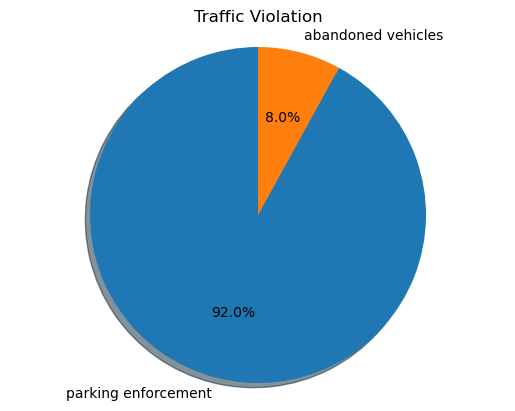

In [20]:
# Filter and count the types related to 'enforcement & abandoned vehicles'
topreason1df = service_request_df['type'][service_request_df['reason'] == 'enforcement & abandoned vehicles'].value_counts().reset_index().rename(columns={'indext': 'Type', 'type': 'value_count'})

# Reset the index of the dataframe
topreason1df.reset_index()

# Uncommented line that filters data based on the 'value_count' being greater than zero
# topreason1df[topreason1df['value_count'] > 0]

# Rename columns in the dataframe
topreason1df.rename(columns={'index': 'Violation', 'value_count': 'incidents_reported'}, inplace=True)

# Calculate the total number of reported incidents for this specific reason
summ = topreason1df['incidents_reported'].sum()

# Calculate the percentage share of each type within the reason 'enforcement & abandoned vehicles'
topreason1df['percentage_share'] = round(topreason1df['incidents_reported'] / summ * 100)

# Create a new figure and axis for the pie chart
fig111, ax111 = plt.subplots()

# Plotting a pie chart representing the percentage share of different violations within 'enforcement & abandoned vehicles'
ax111.pie(topreason1df['percentage_share'], labels=topreason1df['Violation'], autopct='%1.1f%%', shadow=True, startangle=90)

# Set the aspect ratio to ensure the pie chart is drawn as a circle
ax111.axis('equal')

# Set the title for the pie chart
ax111.set_title('Traffic Violation')
# filename = 'traffic-violation'
# plt.savefig(filename+'.png', facecolor=facecolor)

#### 7.1 Parking Enforcement

In [21]:
# Count the total parking enforcement violations reported in each neighborhood
pe_neighborhooddf = service_request_df[(service_request_df['type'] == 'parking enforcement') & (service_request_df['neighborhood'].isna() == False)]['neighborhood'].value_counts().reset_index().rename(columns={'index': 'neighborhood', 'neighborhood': 'total_violation'}).sort_values(by='total_violation', ascending=False)

# Extract neighborhood and opening date information for parking enforcement requests
pe_neighborhooddf_time = service_request_df[(service_request_df['type'] == 'parking enforcement') & (service_request_df['neighborhood'].isna() == False)][['neighborhood', 'open_dt']]

# Convert neighborhood names to lowercase
pe_neighborhooddf['neighborhood'] = pe_neighborhooddf['neighborhood'].str.lower()

# Display the top 5 records from the parking enforcement violations dataframe
pe_neighborhooddf.head(5)

,neighborhood,total_violation
0,south boston / south boston waterfront,11178
1,dorchester,7343
2,east boston,7117
3,allston / brighton,3883
4,south end,3501


In [22]:
# Convert neighborhood names in the 'Name' column to lowercase
# df_places.Name = df_places.Name.str.lower()

# Rename the 'Name' column to 'neighborhood' in the dataframe
df_places.rename(columns={'Name': 'neighborhood'}, inplace=True)

# Display the first 5 records in the dataframe 'df_places' after the changes
df_places.head(5)

,OBJECTID,neighborhood,Acres,Neighborhood_ID,SqMiles,ShapeSTArea,ShapeSTLength,geometry
0,27,Roslindale,1605.568237,15,2.51,6.993827e+07,53563.912597,"MULTIPOLYGON (((-71.12593 42.27201, -71.12611 ..."
1,28,Jamaica Plain,2519.245394,11,3.94,1.097379e+08,56349.937161,"POLYGON ((-71.10499 42.32610, -71.10503 42.326..."
2,29,Mission Hill,350.853564,13,0.55,1.528312e+07,17918.724113,"POLYGON ((-71.09043 42.33577, -71.09050 42.335..."
3,30,Longwood,188.611947,28,0.29,8.215904e+06,11908.757148,"POLYGON ((-71.09811 42.33673, -71.09832 42.337..."
4,31,Bay Village,26.539839,33,0.04,1.156071e+06,4650.635493,"POLYGON ((-71.06663 42.34878, -71.06663 42.348..."


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 26 entries, 0 to 25
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   OBJECTID         26 non-null     int64   
 1   neighborhood     26 non-null     object  
 2   Acres            26 non-null     float64 
 3   Neighborhood_ID  26 non-null     object  
 4   SqMiles          26 non-null     float64 
 5   ShapeSTArea      26 non-null     float64 
 6   ShapeSTLength    26 non-null     float64 
 7   geometry         26 non-null     geometry
 8   total_violation  16 non-null     float64 
dtypes: float64(5), geometry(1), int64(1), object(2)
memory usage: 2.0+ KB


<Axes: title={'center': 'Boston: Neighborhoods with Most Parking Enforcement Violations (2021)'}>

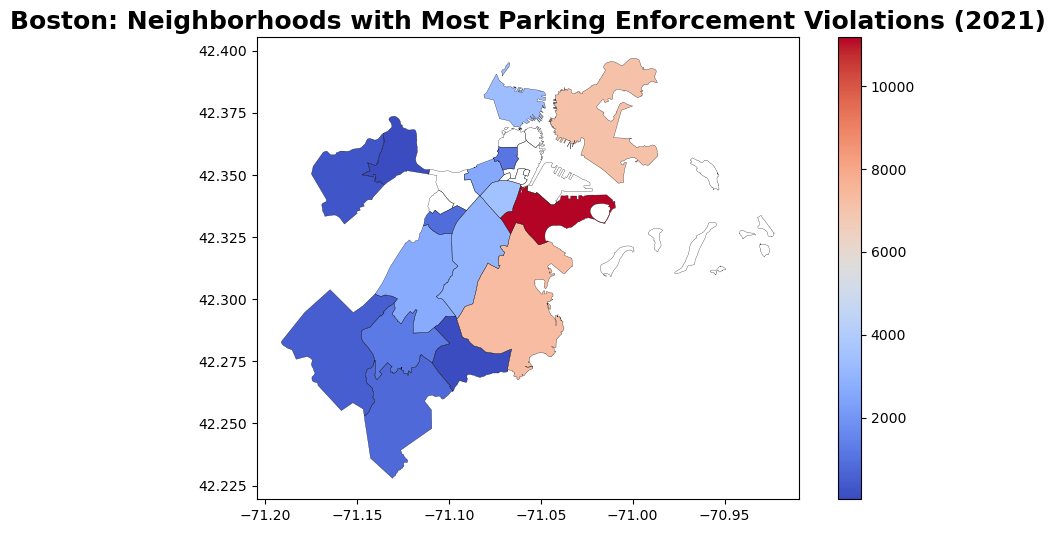

In [23]:
#import geopandas as gpd
#read in once
# Read GeoJSON file containing Boston neighborhoods and convert neighborhood names to lowercase
df_places = gpd.read_file('Boston_Neighborhoods.geojson')
df_places.Name = df_places.Name.str.lower()

# Rename the 'Name' column to 'neighborhood' in the dataframe
df_places.rename(columns={'Name': 'neighborhood'}, inplace=True)

# Perform replacements to standardize neighborhood names for consistency
df_places.neighborhood.replace('south boston', 'south boston / south boston waterfront', inplace=True)
# ... (additional replacements for various neighborhood names)

# Merge data from the parking enforcement violations dataframe ('pe_neighborhooddf') into the neighborhood GeoDataFrame
df_places = pd.merge(left=df_places, right=pe_neighborhooddf, left_on='neighborhood', right_on='neighborhood', how='left')

# Display information about the resulting merged dataframe
df_places.info()

# Drop rows with missing values
df_places.dropna()

# Plotting the Boston neighborhood boundaries and their parking enforcement violation counts
ax = df_places.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(10, 6))
ax.set_title('Boston: Neighborhoods with Most Parking Enforcement Violations (2021)', size=18, weight='bold')
df_places.plot(ax=ax, column='total_violation', legend=True, cmap='coolwarm')

# Save the plot as an image (uncomment the following line to save)
# filename = 'neighborhood-with-most-parking-enforcement_violation'
# plt.savefig(filename+'.png', facecolor=facecolor)

South Boston has the most violations since it is the most popular district with huge, modern restaurants, bars, and hotels.

#### 7.2 Vehicle Abandoned

In [24]:
# Filtering the dataset for 'abandoned vehicles' type and non-null neighborhoods, then counting violations per neighborhood
av_neighborhooddf = service_request_df[(service_request_df['type'] == 'abandoned vehicles') & (service_request_df['neighborhood'].isna() == False)]['neighborhood'].value_counts().reset_index().rename(columns={'index': 'neighborhood', 'neighborhood': 'total_violation_av'}).sort_values(by='total_violation_av', ascending=False)

# Fetching columns 'neighborhood' and 'open_dt' for abandoned vehicles type, non-null neighborhoods
av_neighborhooddf11 = service_request_df[(service_request_df['type'] == 'abandoned vehicles') & (service_request_df['neighborhood'].isna() == False)][['neighborhood', 'open_dt']]

# Convert neighborhood names to lowercase for consistency
av_neighborhooddf.neighborhood = av_neighborhooddf.neighborhood.str.lower()

# Displaying the first 5 records in the 'av_neighborhooddf' dataframe after modifications
av_neighborhooddf.head(5)

,neighborhood,total_violation_av
0,dorchester,1228
1,roxbury,757
2,hyde park,521
3,greater mattapan,406
4,jamaica plain,395


In [25]:
# Merging the 'df_places' and 'av_neighborhooddf' DataFrames based on the 'neighborhood' column, keeping all records from 'df_places'
df_places = pd.merge(left=df_places, right=av_neighborhooddf, left_on='neighborhood', right_on='neighborhood', how='left')

# Displaying information about the resulting merged dataframe 'df_places'
df_places.info()

# Dropping rows with missing values (NaN) from 'df_places'
df_places.dropna(inplace=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 26 entries, 0 to 25
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   OBJECTID            26 non-null     int64   
 1   neighborhood        26 non-null     object  
 2   Acres               26 non-null     float64 
 3   Neighborhood_ID     26 non-null     object  
 4   SqMiles             26 non-null     float64 
 5   ShapeSTArea         26 non-null     float64 
 6   ShapeSTLength       26 non-null     float64 
 7   geometry            26 non-null     geometry
 8   total_violation     16 non-null     float64 
 9   total_violation_av  16 non-null     float64 
dtypes: float64(6), geometry(1), int64(1), object(2)
memory usage: 2.2+ KB


<Axes: title={'center': 'Boston: Neighborhoods with Most Abandoned Vehicles (2021)'}>

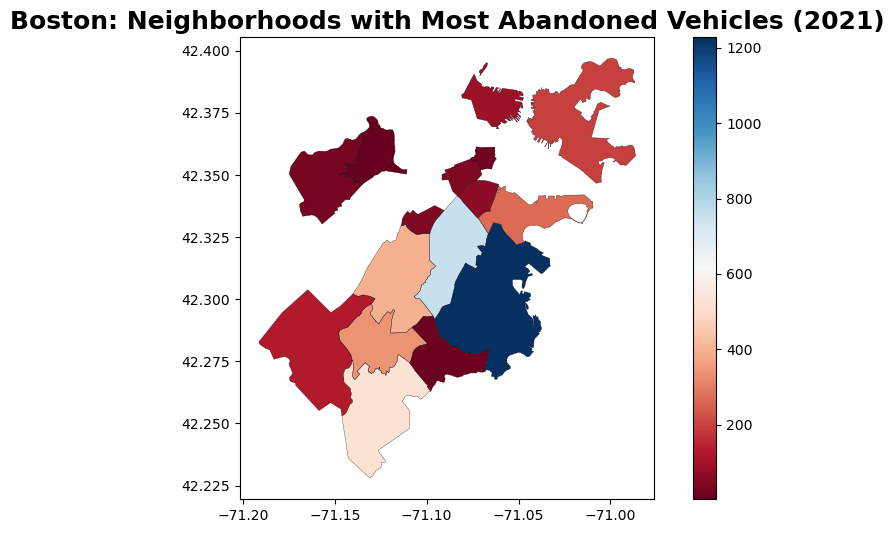

In [26]:
# Plotting the Boston neighborhood boundaries with a specified edge color, line width, and figure size
ax = df_places.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(10, 6))

# Setting the title for the plot indicating the neighborhood with the most Abandoned Vehicles in 2021
ax.set_title('Boston: Neighborhoods with Most Abandoned Vehicles (2021)', size=18, weight='bold')

# Plotting the 'df_places' GeoDataFrame on the same plot using the 'total_violation_av' column to represent data
df_places.plot(ax=ax, column='total_violation_av', legend=True, cmap='RdBu')

# Saving the plot as an image (uncomment the following line to save)
# filename = 'neighborhood-with-most-abandoned_vehicle'
# plt.savefig(filename+'.png', facecolor=facecolor)

## Conclusion

Below are the answers to the objectives set at the start of the project
1.	Citizen App is the most common way to raise requests.
2.	On average 751 requests are submitted.
3.	Department with the least turnaround time is Animal control and the highest is Property Management.
4.	The request most reported are for Traffic violations which in turn helped to generate a ton of revenue for the council.
